# Multiple Linear Regression with Scikit-learn

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Loading the Data

In [2]:
# The advertising dataset captures sales revenue generated concerning advertisement spending
# across multiple channels like radio, TV, and newspapers.
advert = pd.read_csv('advertising.csv')
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
advert.drop(['Unnamed: 0'], axis=1, inplace=True)
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Relationship between Features and Response

/Users/alinakurliantseva/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


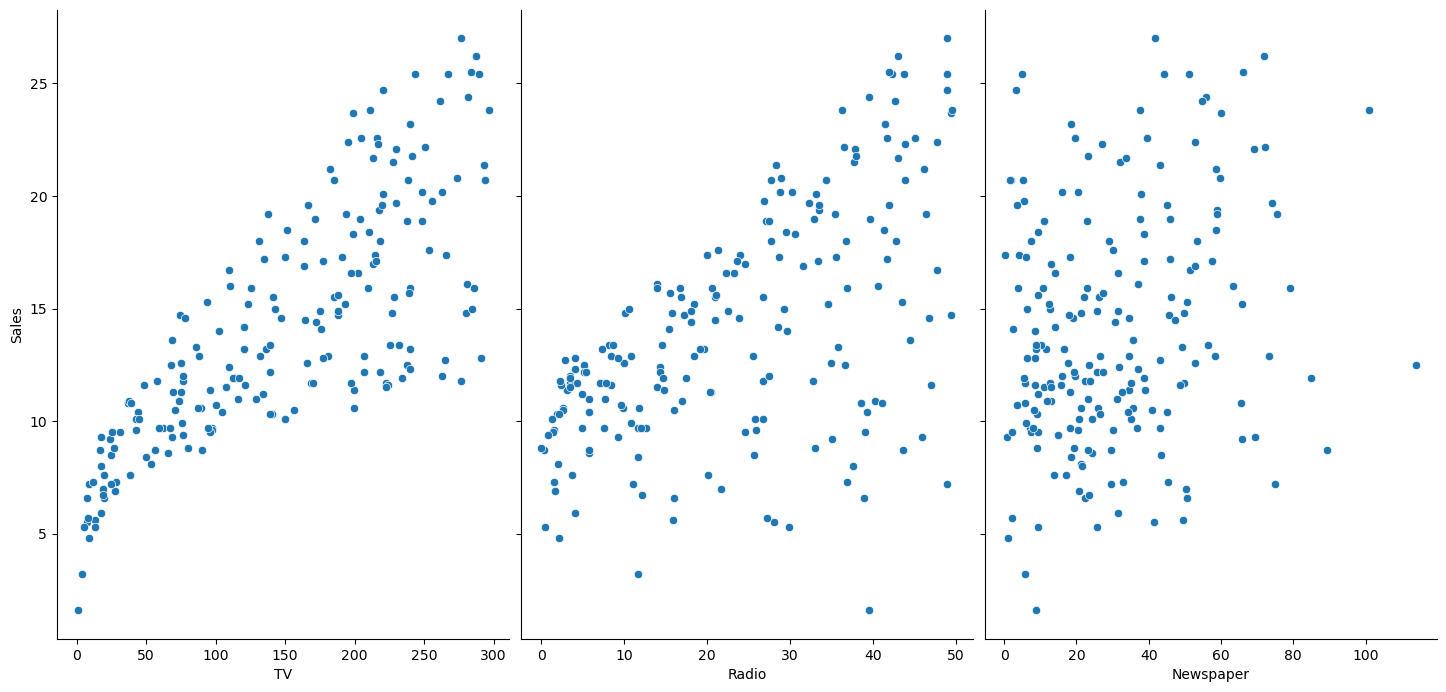

In [5]:
sns.pairplot(advert, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales',
             height=7, aspect=0.7);

### Multiple Linear Regression - Estimating Coefficients

In [6]:
X = advert[['TV', 'Radio', 'Newspaper']]
y = advert.Sales
lm1 = LinearRegression()
lm1.fit(X, y)
print(lm1.intercept_)
print(lm1.coef_)

2.9388893694593996
[ 0.04576465  0.18853002 -0.00103749]


In [7]:
list(zip(['TV', 'Radio', 'Newspaper'], lm1.coef_))

[('TV', 0.04576464545539765),
 ('Radio', 0.18853001691820453),
 ('Newspaper', -0.0010374930424762346)]

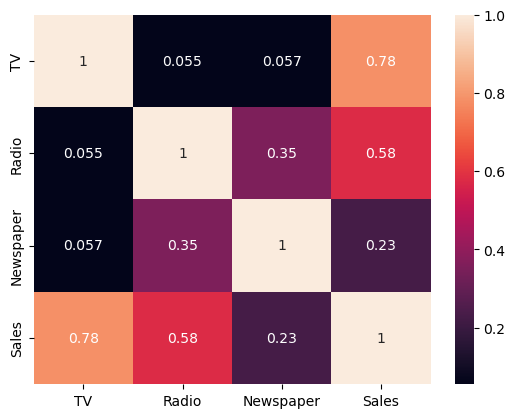

In [8]:
sns.heatmap(advert.corr(), annot=True);

### Feature Selection

In [9]:
lm2 = LinearRegression().fit(X[['TV', 'Radio']], y)
lm2_pred = lm2.predict(X[['TV', 'Radio']])
print('R2:', r2_score(y, lm2_pred))

R2: 0.8971942610828957


In [10]:
lm3 = LinearRegression().fit(X[['TV', 'Radio', 'Newspaper']], y)
lm3_pred = lm3.predict(X[['TV', 'Radio', 'Newspaper']])
print('R2:', r2_score(y, lm3_pred))

R2: 0.8972106381789522


### Model Evaluation

In [11]:
X = advert[['TV', 'Radio', 'Newspaper']]
y = advert.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lm4 = LinearRegression().fit(X_train, y_train)
lm4_pred = lm4.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, lm4_pred)))
print('R2:', r2_score(y_test, lm4_pred))

RMSE: 1.6970632663793623
R2: 0.8935163320163658


In [12]:
X = advert[['TV', 'Radio']]
y = advert.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lm5 = LinearRegression().fit(X_train, y_train)
lm5_pred = lm5.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, lm5_pred)))
print('R2:', r2_score(y_test, lm5_pred))

RMSE: 1.6893770318599999
R2: 0.8944787062601195


### Interaction Effect (Synergy)

In [13]:
advert['Interaction'] = advert['TV'] * advert['Radio']
X = advert[['TV', 'Radio', 'Interaction']]
y = advert.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lm6 = LinearRegression().fit(X_train, y_train)
lm6_pred = lm6.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, lm6_pred)))
print('R2:', r2_score(y_test, lm6_pred))

RMSE: 0.8502085687189503
R2: 0.9732737582951896
